In [576]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Lachin\\NIBM Dip\\Python\\NFA 2018 Edition.csv", parse_dates=[1])

In [3]:
data.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992-01-01,1,AreaPerCap,0.140020,0.199159,0.097000,0.036817,0.029258,0.000000,5.022540e-01,3A
1,Armenia,1992-01-01,1,AreaTotHA,483000.000000,687000.000000,334600.000000,127000.000000,100925.003100,0.000000,1.732525e+06,3A
2,Armenia,1992-01-01,1,BiocapPerCap,0.161129,0.135023,0.083836,0.013718,0.033669,0.000000,4.273741e-01,3A
3,Armenia,1992-01-01,1,BiocapTotGHA,555812.972600,465763.337400,289190.662300,47320.224590,116139.598200,0.000000,1.474227e+06,3A
4,Armenia,1992-01-01,1,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,1.730092e+00,3A


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69616 entries, 0 to 69615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         69616 non-null  object        
 1   year            69616 non-null  datetime64[ns]
 2   country_code    69616 non-null  int64         
 3   record          69616 non-null  object        
 4   crop_land       50824 non-null  float64       
 5   grazing_land    50824 non-null  float64       
 6   forest_land     50824 non-null  float64       
 7   fishing_ground  50824 non-null  float64       
 8   built_up_land   50824 non-null  float64       
 9   carbon          50824 non-null  float64       
 10  total           69616 non-null  float64       
 11  QScore          69616 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 6.4+ MB


In [5]:
print("\n Number of rows :{}\n".format(data.shape[0]))
print("\n Number of columns: {}".format(data.shape[1]))


 Number of rows :69616


 Number of columns: 12


In [6]:
#Checking missing values
data.isnull().sum()

country               0
year                  0
country_code          0
record                0
crop_land         18792
grazing_land      18792
forest_land       18792
fishing_ground    18792
built_up_land     18792
carbon            18792
total                 0
QScore                0
dtype: int64

In [7]:
#dropping missing values
data.dropna(how = 'any', inplace=True)

In [8]:
print("\n Number of rows after removing missing values:{}\n".format(data.shape[0]))
print("\n Number of columns after removing missing values: {}".format(data.shape[1]))


 Number of rows after removing missing values:50824


 Number of columns after removing missing values: 12


In [9]:
#checking duplicates
print("\n Number of duplicates: {}".format(data.duplicated().sum()))


 Number of duplicates: 0


In [10]:
data.head(5)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992-01-01,1,AreaPerCap,0.140020,0.199159,0.097000,0.036817,0.029258,0.000000,5.022540e-01,3A
1,Armenia,1992-01-01,1,AreaTotHA,483000.000000,687000.000000,334600.000000,127000.000000,100925.003100,0.000000,1.732525e+06,3A
2,Armenia,1992-01-01,1,BiocapPerCap,0.161129,0.135023,0.083836,0.013718,0.033669,0.000000,4.273741e-01,3A
3,Armenia,1992-01-01,1,BiocapTotGHA,555812.972600,465763.337400,289190.662300,47320.224590,116139.598200,0.000000,1.474227e+06,3A
4,Armenia,1992-01-01,1,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,1.730092e+00,3A


In [35]:
s1 = data['country'].value_counts()
s2 = s1[s1>=432]
countries = s2.keys()

In [643]:
countries = list(countries)
countries.sort()
#countries

### Interpreting the Data Sets and the Variables

- Data Set is about ecological footprint of production and total areas in hectares.
- Ecological Footprint is a measure of how much area of biologically productive land and water an individual, population, or activity requires to produce all the resources it consumes and to absorb the waste it generates.

**Variables**
- Country	     - Country which the data is about
- Year - Year
- Country Code - Code of the country
* Record
        - BiocapPerCap - Biocapacity per capita
        - AreaTotHA - Area total hectares
        - EFProdTotGHA - Ecological footprint production in total global hectares
        - EFConsPerCap - Ecolological Footprint consumption per capita
        - BiocapTotGHA - Biocapacity total global hectares in total global hectares
        - EFConsTotGHA - Ecological Foot print consumption in total global hectares
        - AreaPerCap - Area per capita
- Crop Land - Data about crop lands
- Grazing Land - Data about Gazing lands
- Forest Land - Data about forrest land
- Fishing Ground - Data about fishing grounds
- Built up Land - Data about built up lands
- carbon - Co2 absorption
- Total - total Ecological foot print
- Q score - Index to measure the data quality

**For more Info**
- https://data.footprintnetwork.org/#/abouttheData

### Why this data selected and the message which can be given..

- Increaing CO2 concentration has caused many disasters including increasing global warmth which directly affect  to the whole world's weather patterns and climate changes
- Ecological footprint is therefore an important topic in this era.
- Deriving analysis about countries and their ecological foot print balancing is more imporatnt to the countries to take firther more decisions.
- as, the message, analysis of factors which affect the global hectares can be derived through correlation analysis.
- Time series analysis to identify the growths or declines of ecologicla foot prints of countries.
- What are the best countries balancing the ecological foot print arounf the world? By answering that question, other countries can follow up their polciies since this is a global phenomena.

### Countries seletced for the analysis

- USA
- UK
- Canada
- India

In [55]:
df1 = data[(data['country'] =='United States of America')|(data['country'] =='Canada')|(data['country'] =='United Kingdom')|(data['country'] =='India')]

In [58]:
df1.reset_index(drop=True, inplace=True)
df1.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Canada,1961-01-01,33,AreaPerCap,2.600747e+00,1.215682e+00,1.860724e+01,1.878245e+01,0.029282,0.000000,4.123541e+01,3A
1,Canada,1961-01-01,33,AreaTotHA,4.758300e+07,2.224200e+07,3.404363e+08,3.436419e+08,535732.971200,0.000000,7.544389e+08,3A
2,Canada,1961-01-01,33,BiocapPerCap,1.470099e+00,6.383620e-01,1.724884e+01,6.882446e+00,0.016552,0.000000,2.625629e+01,3A
3,Canada,1961-01-01,33,BiocapTotGHA,2.689679e+07,1.167941e+07,3.155830e+08,1.259205e+08,302828.670800,0.000000,4.803825e+08,3A
4,Canada,1961-01-01,33,EFConsPerCap,5.949279e-01,6.208782e-01,2.342809e+00,6.327288e-01,0.016552,3.230898,7.438794e+00,3A


In [59]:
print("\n Number of rows :{}\n".format(df1.shape[0]))
print("\n Number of columns: {}".format(df1.shape[1]))


 Number of rows :1728


 Number of columns: 12


## Scatter Plots

In [101]:
def scatter_lot_record(country,independent, dependent, figsize = (8,8)):
    d1 = df1[df1['country'] == country]
    count = d1['record'].value_counts()
    records = list(count.keys())
       
    plt.figure(figsize = figsize)
    for index,record in enumerate(records):
        c1 = random.choice([i/10 for i in range(11)])
        c2 = random.choice([i/10 for i in range(11)])
        c3 = random.choice([i/10 for i in range(11)])
        color_map = (c1,c2,c3)
        d2 = d1[d1['record'] == record]
        plt.subplot(4,2,index+1)
        plt.scatter(x = d2[independent], y = d2[dependent], label = f"{country}",color = color_map)
        plt.xlabel(independent)
        plt.legend(loc = "best")
        plt.ylabel(dependent)
        plt.title(f"Scatter plot between {independent} and {dependent} with respect to {record}")

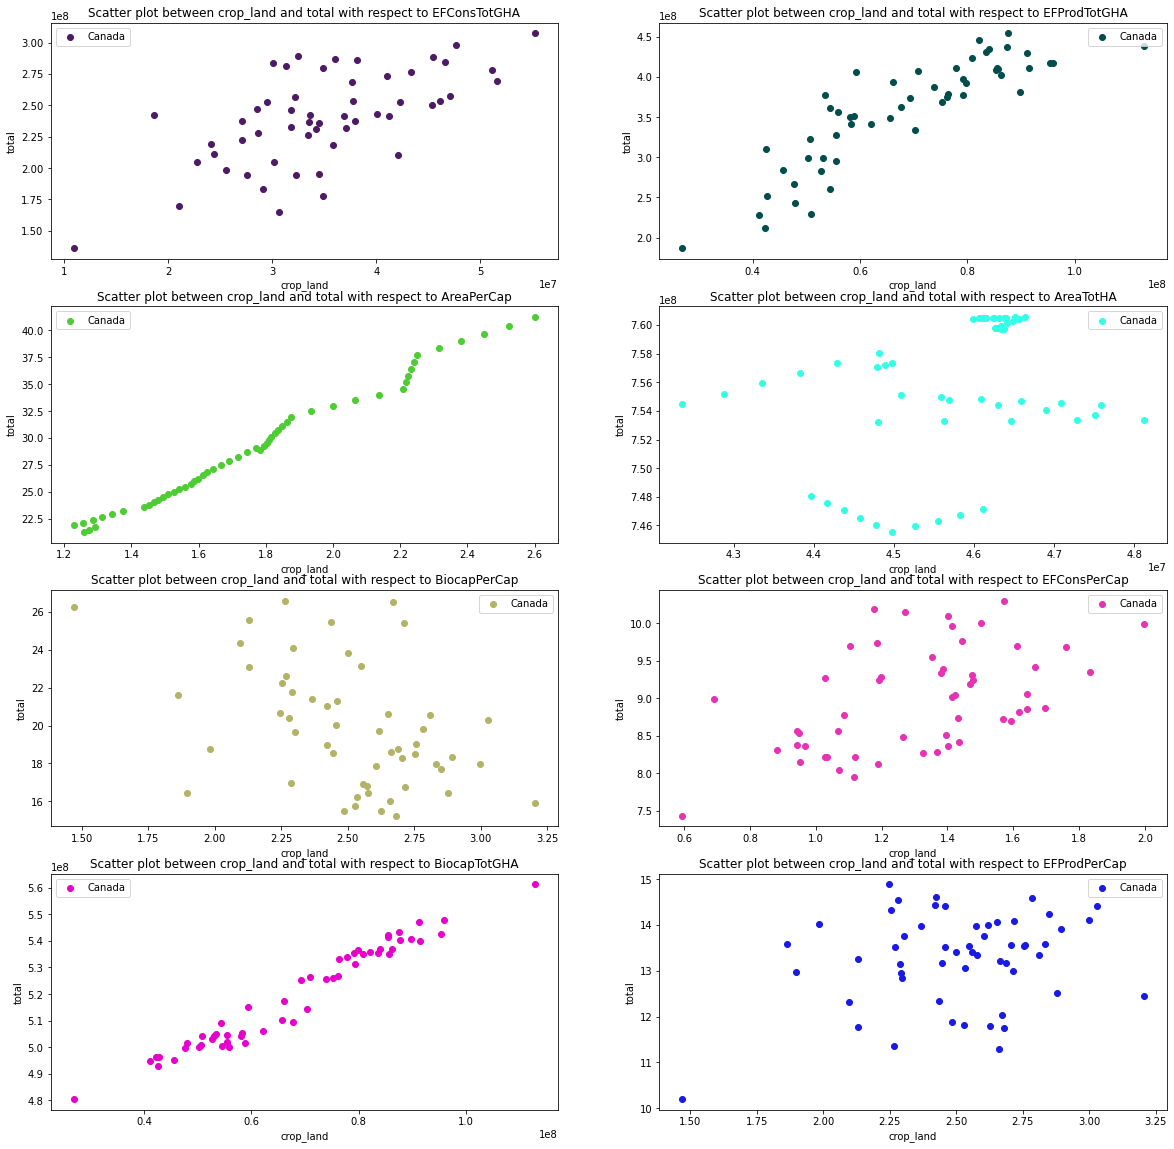

In [102]:
scatter_lot_record('Canada','crop_land','total', figsize=(20,20))

- There is a high positive linear relation ship between crop land and total ecological foot print with respect to Biocapacity total global hectares, Area per capita, Ecological footprint production total global hectares
- Moderate linear relationship between crop land and total ecological foot print with respect to Ecolological Footprint consumption per capita, Ecological Foot print consumption in total global hectares

In [104]:
def scatter_lot_country(record,independent, dependent, figsize = (8,8)):
    d1 = df1[df1['record'] == record]
    count = d1['country'].value_counts()
    countries = list(count.keys())
       
    plt.figure(figsize = figsize)
    for index,country in enumerate(countries):
        c1 = random.choice([i/10 for i in range(11)])
        c2 = random.choice([i/10 for i in range(11)])
        c3 = random.choice([i/10 for i in range(11)])
        color_map = (c1,c2,c3)
        d2 = d1[d1['country'] == country]
        plt.subplot(2,2,index+1)
        plt.scatter(x = d2[independent], y = d2[dependent], label = f"{country}",color = color_map)
        plt.xlabel(independent)
        plt.legend(loc = "best")
        plt.ylabel(dependent)
        plt.title(f"Scatter plot between {independent} and {dependent} with respect to {record}")

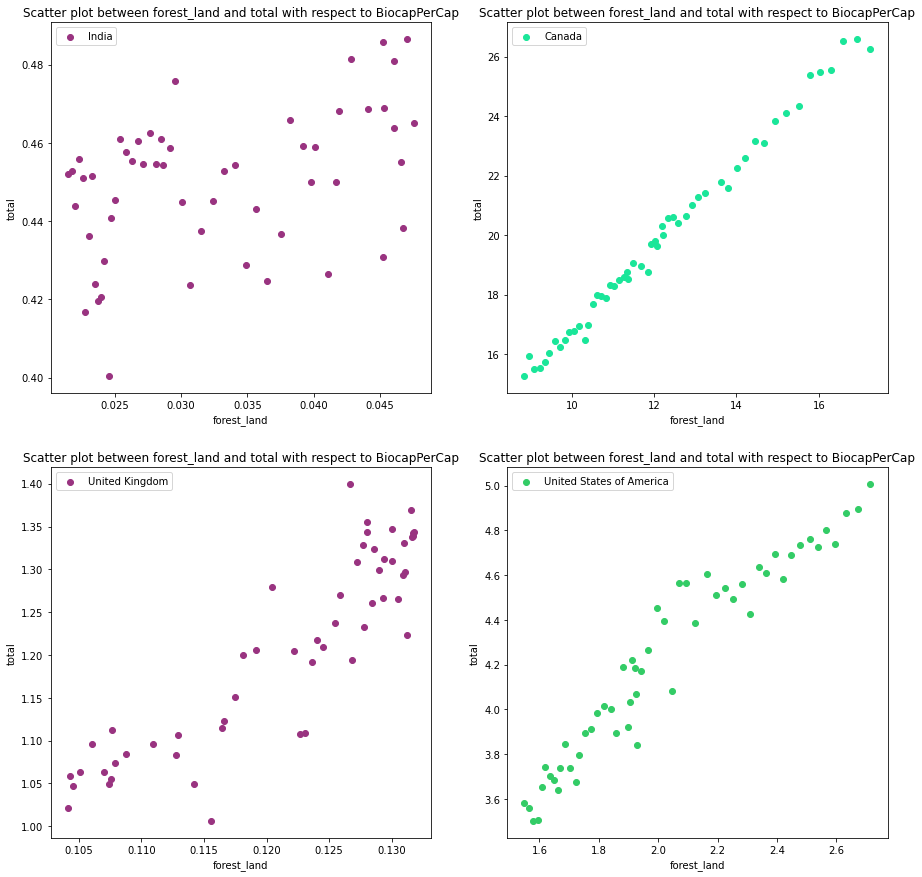

In [107]:
scatter_lot_country('BiocapPerCap','forest_land','total',figsize = (15,15))

- There is a high positive relationship between forrest_land and total ecological foot print in countries USA and Canada.
- In UK relationship is somewhat moderate
- In India, it is hard to identify a linear relationship

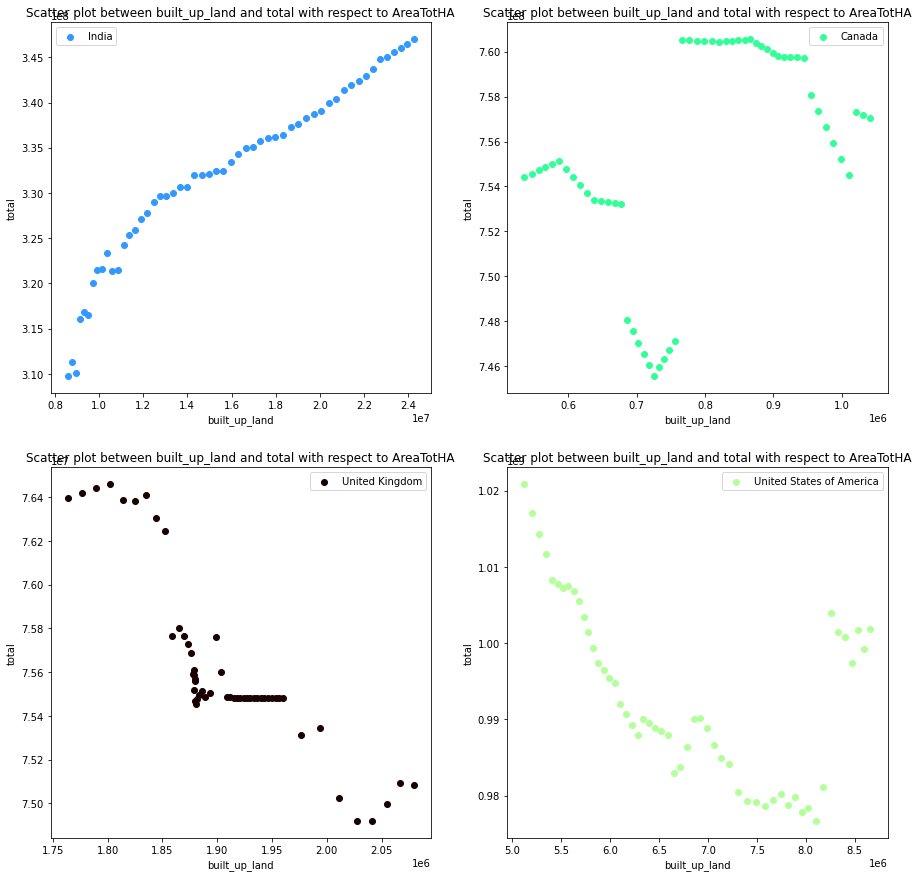

In [109]:
scatter_lot_country('AreaTotHA','built_up_land','total',figsize = (15,15))

- There is a high negative relationship between bulit up land and total ecological foot print in USA and soem moderate negative relationship in UK
- In Canada there is no relationship visible
- B ut in India, a perfect relationship is visible. Interpretations can be done base on the data quality

## Time series analysis using Line Plots

In [191]:
def Time_Series_country(record, var1 ,figsize = (8,8)):
    plt.style.use(['seaborn'])
    d1 = df1[df1['record'] == record]
    count = d1['country'].value_counts()
    countries = list(count.keys())
       
    plt.figure(figsize = figsize)
    for index,country in enumerate(countries):
        c1 = random.choice([i/10 for i in range(11)])
        c2 = random.choice([i/10 for i in range(11)])
        c3 = random.choice([i/10 for i in range(11)])
        color_map = (c1,c2,c3)
        d2 = d1[d1['country'] == country]
        plt.subplot(4,1,index+1)
        plt.plot(d2['year'], d2[var1], linestyle='solid', label = f'{country}', color = color_map)
        plt.xlabel("year")
        plt.legend(loc = "best",fontsize = 15, labelcolor = 'black')
        plt.ylabel(f"{var1} over the years")
        plt.title(f"{var1} ecological foot print fluctuations over the years with respect to {record}")

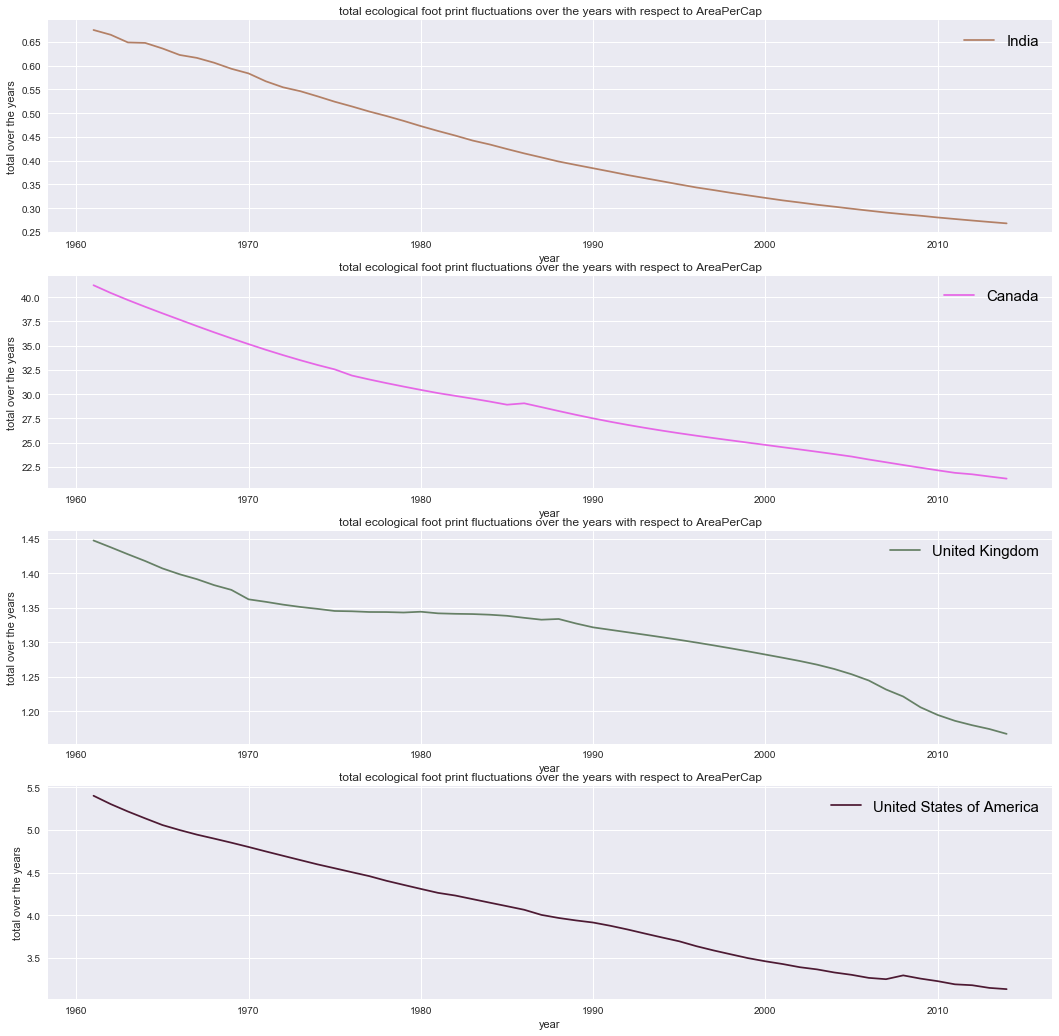

In [192]:
Time_Series_country('AreaPerCap','total',figsize = (18,18))

- Over the years, total ecological foot prints according to the area per capita has been decreased.
- This can be happened due to the population increase.

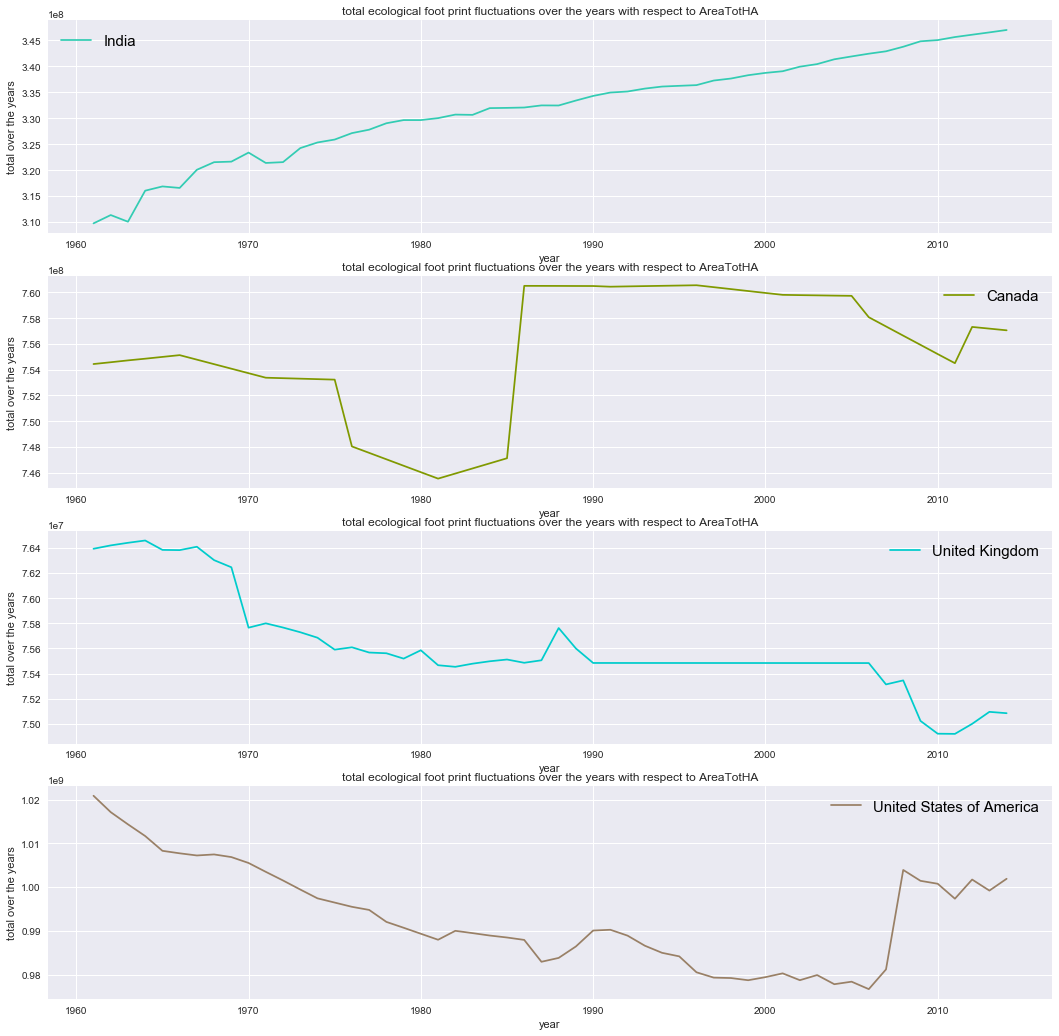

In [193]:
Time_Series_country('AreaTotHA','total',figsize = (18,18))

- Total Hectares of ecologicla foot prints are increased over the years in India but in other countries there are fulctuations.

In [423]:
def Time_series_all(record,var1):
    stc = StandardScaler()
    c1 = df1[(df1['record'] == record)&(df1['country'] == 'India')]
    c2 = df1[(df1['record'] == record)&(df1['country'] == 'Canada')]
    c3 = df1[(df1['record'] == record)&(df1['country'] == 'United Kingdom')]
    c4 = df1[(df1['record'] == record)&(df1['country'] == 'United States of America')]
    
    a1 = c1[var1].values
    a2 = c2[var1].values
    a3 = c3[var1].values
    a4 = c4[var1].values
    
    title_style = dict(fontsize = 20, fontweight = 1000)
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    ax.plot(c1['year'],stc.fit_transform(a1.reshape(-1,1)), label = "India", c='red', linestyle = "solid")
    ax.plot(c2['year'],stc.fit_transform(a2.reshape(-1,1)), label = "Canada", c='blue', linestyle = "dashed")
    ax.plot(c2['year'],stc.fit_transform(a3.reshape(-1,1)), label = "UK", c='black', linestyle = "dashdot")
    ax.plot(c4['year'],stc.fit_transform(a4.reshape(-1,1)), label = "USA", c='orange', linestyle = "solid")
    ax.legend(loc = 'best', fontsize=15)
    ax.set_xlabel("Years")
    ax.set_ylabel(f"{var1} over the years - (Values are standardized)")
    ax.set_title(f"{var1} fluctuations over the years with the countries",**title_style)
    
#     style = dict(size = 12, color = 'black', fontweight = 500, fontstyle = 'italic')
#     text = "Preprocessing was done to y axis in order to align the values in a specific range, otherwise fluctuations are not clearly visible."
#     ax.text(1990,2, text,**style)
    

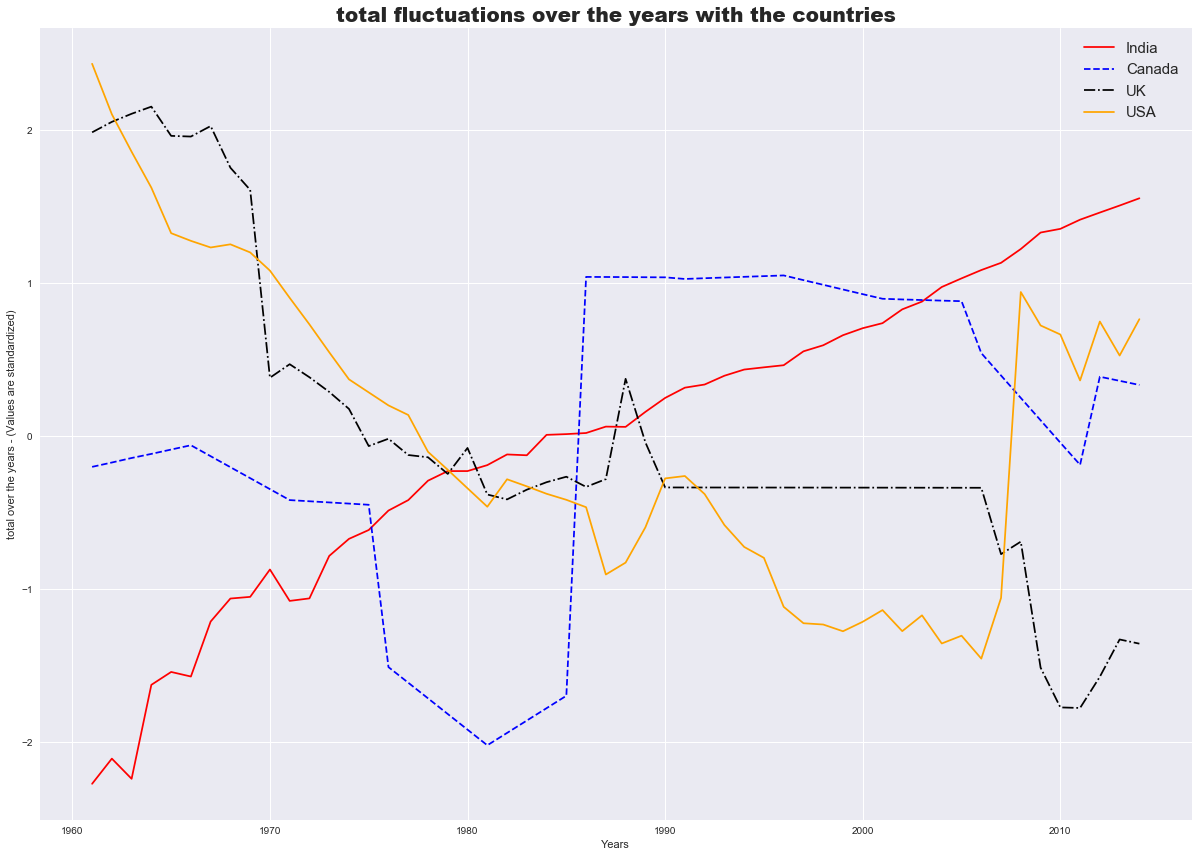

In [424]:
Time_series_all('AreaTotHA','total')

- Total ecological foot print fluctuations over the years in Indial, UK, USA and Canada in total hectares

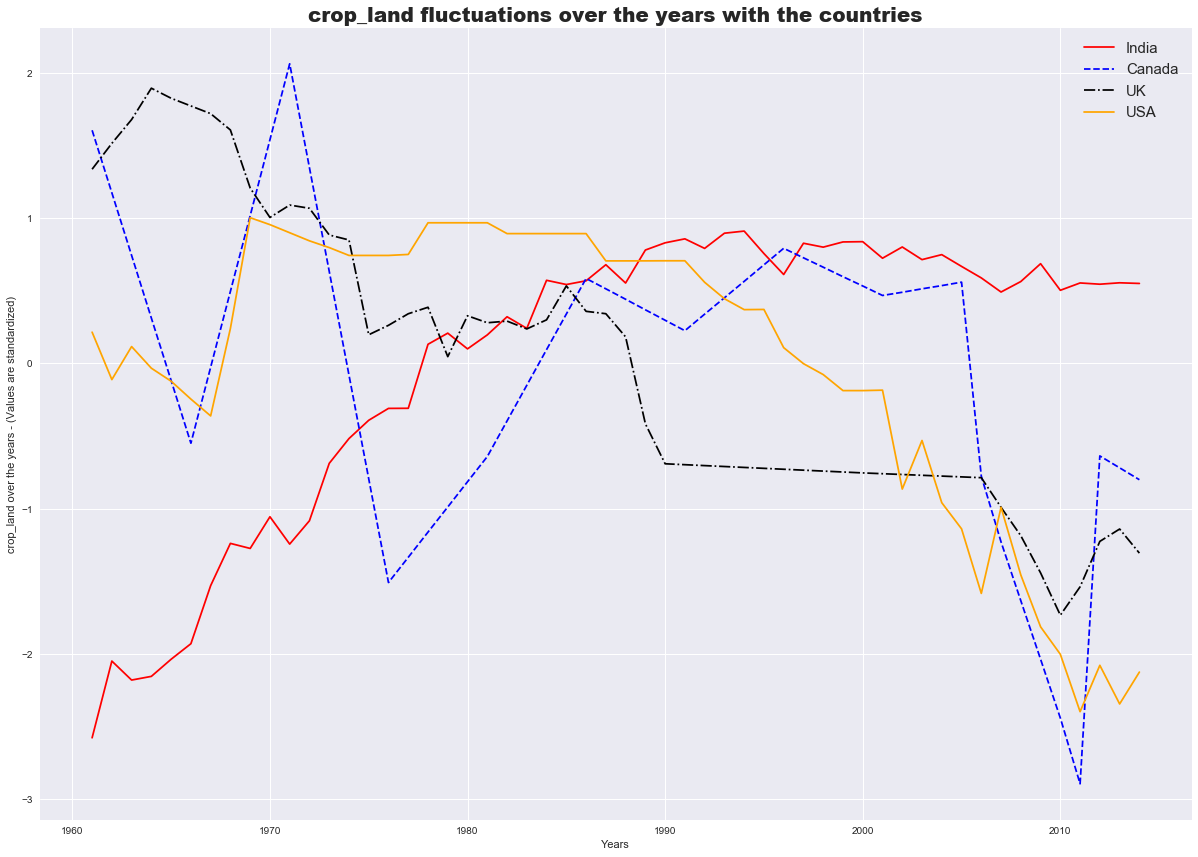

In [425]:
Time_series_all('AreaTotHA','crop_land')

- fluctuations of crop lands over the years

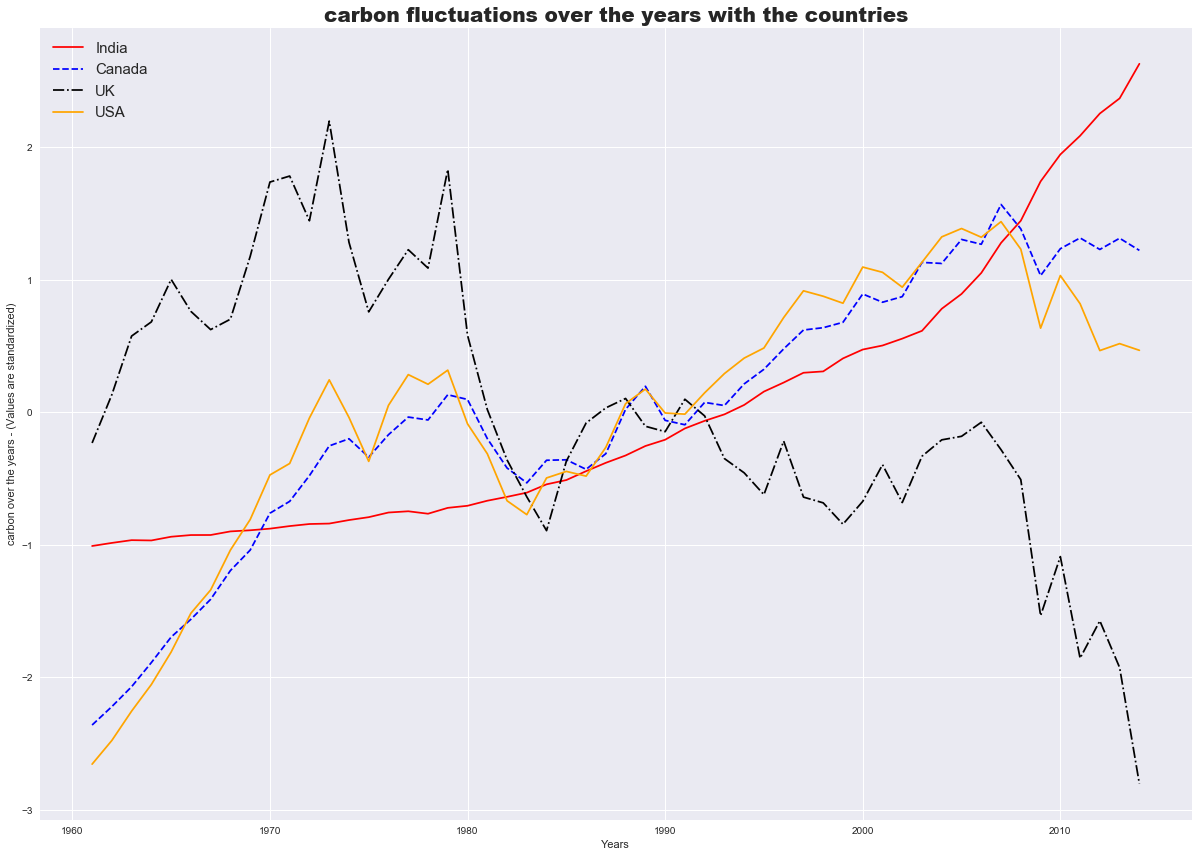

In [426]:
Time_series_all('EFProdTotGHA','carbon')

- carbon fluctuations along with the years in different countries

## Pie Charts

In [332]:
df1.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Canada,1961-01-01,33,AreaPerCap,2.600747e+00,1.215682e+00,1.860724e+01,1.878245e+01,0.029282,0.000000,4.123541e+01,3A
1,Canada,1961-01-01,33,AreaTotHA,4.758300e+07,2.224200e+07,3.404363e+08,3.436419e+08,535732.971200,0.000000,7.544389e+08,3A
2,Canada,1961-01-01,33,BiocapPerCap,1.470099e+00,6.383620e-01,1.724884e+01,6.882446e+00,0.016552,0.000000,2.625629e+01,3A
3,Canada,1961-01-01,33,BiocapTotGHA,2.689679e+07,1.167941e+07,3.155830e+08,1.259205e+08,302828.670800,0.000000,4.803825e+08,3A
4,Canada,1961-01-01,33,EFConsPerCap,5.949279e-01,6.208782e-01,2.342809e+00,6.327288e-01,0.016552,3.230898,7.438794e+00,3A


In [393]:
def pie_charts(record, figsize = (16,16)):
    s1 = df1[df1['record'] == record]
    s2 = s1.groupby('country').agg({'total':'mean','crop_land':'mean','grazing_land':'mean','forest_land':'mean','fishing_ground':'mean','built_up_land':'mean'})
    s2.reset_index(inplace=True)
    
    
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    plt.figure(figsize = figsize)
    for index,column in enumerate(s2.columns):
        if (column == 'country'):
            continue
        plt.subplot(3,2,index)
        plt.pie(s2[column], labels=s2['country'], explode = [0.2,0.2,0.2,0.2],colors=colors, autopct='%1.1f%%', radius = 0.9)
        plt.title(f"{column} distribution with {record} in selected countries")
        
        

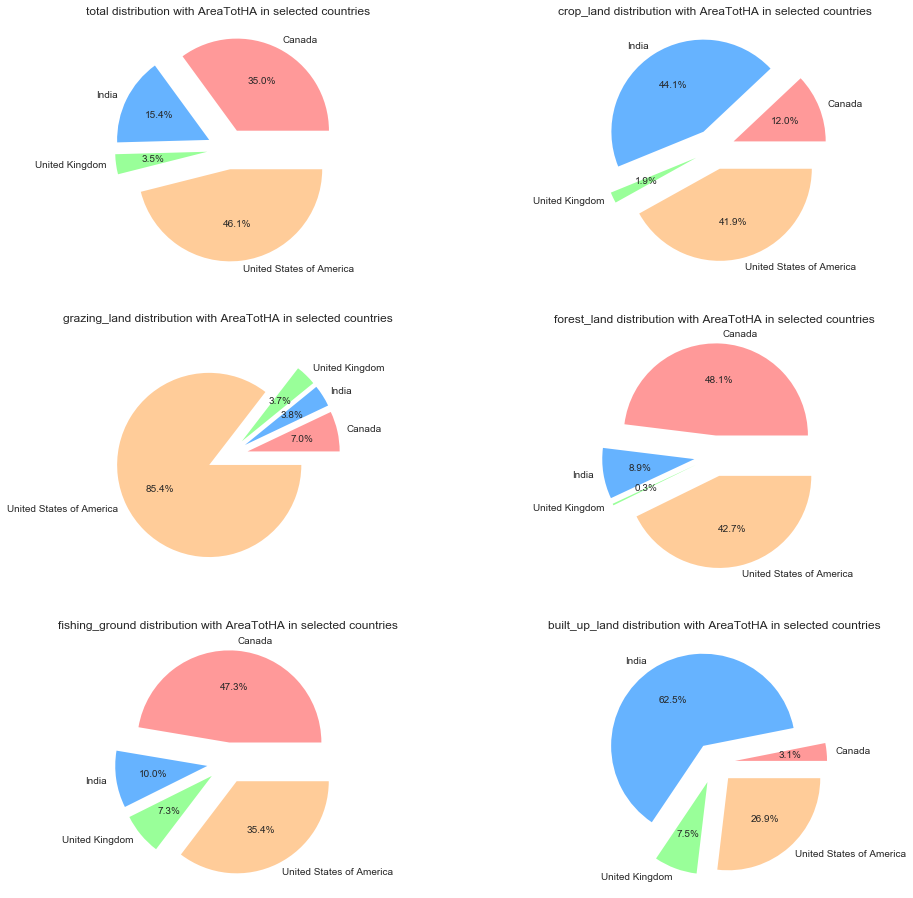

In [394]:
pie_charts('AreaTotHA')

 - How the variables crop land, grazing land, forest land, fishing gorund, built up land and total ecological foot prints vary within country to country.
 - USA is having more of the lands according to the per-capita.
 - UK is having the lowest

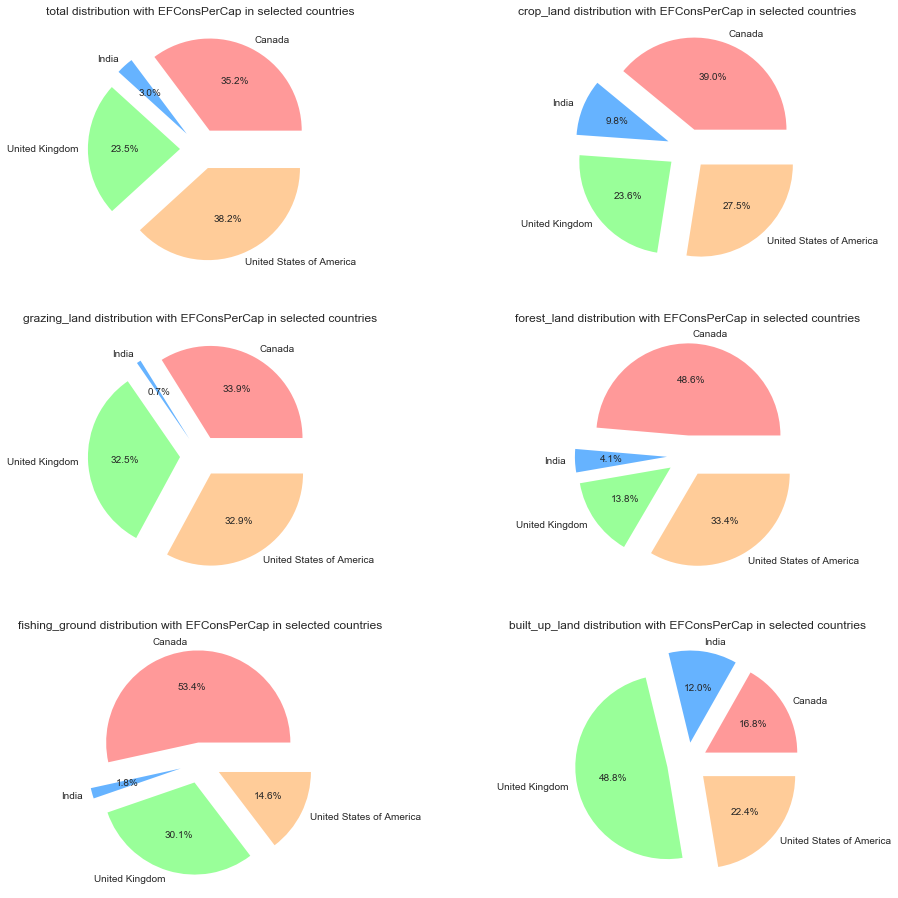

In [395]:
pie_charts('EFConsPerCap');

 - How the variables crop land, grazing land, forest land, fishing gorund, built up land and total ecological foot prints vary with Ecological Foot print consumption in total global hectares within specified countries

In [403]:
df1.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Canada,1961-01-01,33,AreaPerCap,2.600747e+00,1.215682e+00,1.860724e+01,1.878245e+01,0.029282,0.000000,4.123541e+01,3A
1,Canada,1961-01-01,33,AreaTotHA,4.758300e+07,2.224200e+07,3.404363e+08,3.436419e+08,535732.971200,0.000000,7.544389e+08,3A
2,Canada,1961-01-01,33,BiocapPerCap,1.470099e+00,6.383620e-01,1.724884e+01,6.882446e+00,0.016552,0.000000,2.625629e+01,3A
3,Canada,1961-01-01,33,BiocapTotGHA,2.689679e+07,1.167941e+07,3.155830e+08,1.259205e+08,302828.670800,0.000000,4.803825e+08,3A
4,Canada,1961-01-01,33,EFConsPerCap,5.949279e-01,6.208782e-01,2.342809e+00,6.327288e-01,0.016552,3.230898,7.438794e+00,3A


In [420]:
def bar_charts(record ,figsize = (16,16)):
    s1 = df1[df1['record'] == record]
    s2 = s1.groupby('country').agg({'total':'mean','crop_land':'mean','grazing_land':'mean','forest_land':'mean','fishing_ground':'mean','built_up_land':'mean'})
    s2.reset_index(inplace=True)
    
    
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    plt.figure(figsize = figsize)
    for index,column in enumerate(s2.columns):
        c1 = random.choice([i/10 for i in range(11)])
        c2 = random.choice([i/10 for i in range(11)])
        c3 = random.choice([i/10 for i in range(11)])
        color_map = (c1,c2,c3)
        if (column == 'country'):
            continue
        plt.subplot(3,2,index)
        plt.bar(x = s2['country'], height=s2[column],color = color_map, edgecolor = 'black', linewidth = 1 )
        plt.title(f"{column} distribution measured with {record} in selected countries")

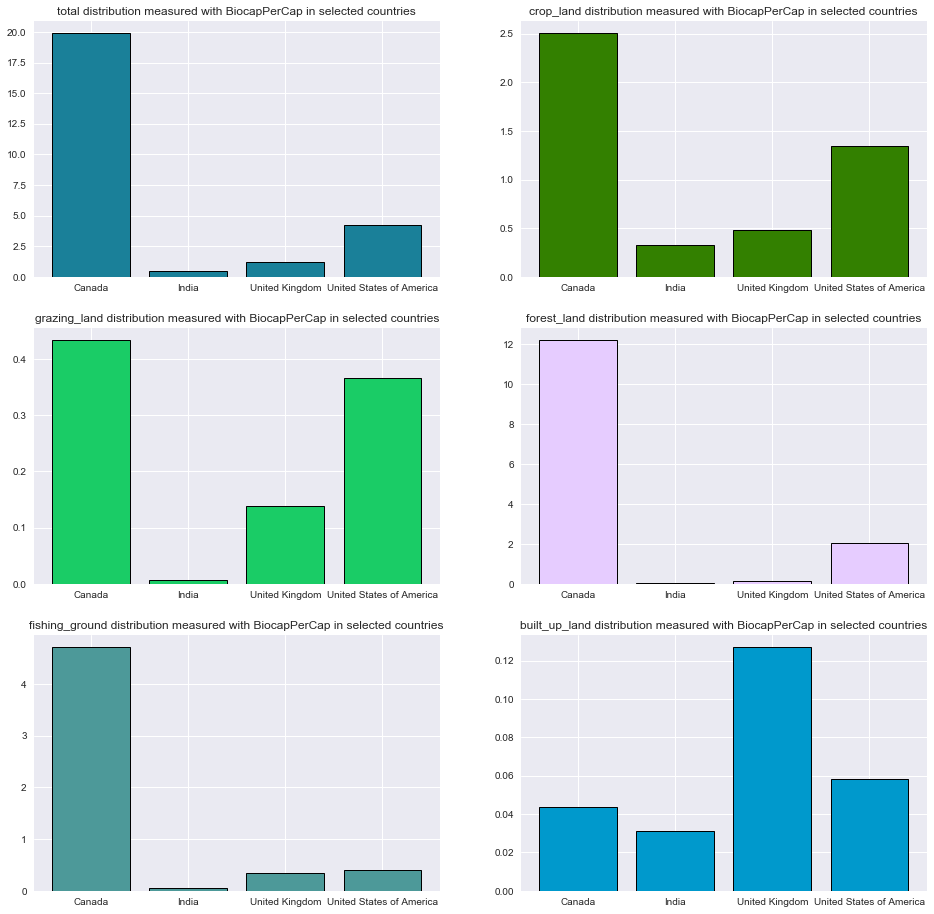

In [421]:
bar_charts('BiocapPerCap')

- How the variables crop land, grazing land, forest land, fishing gorund, built up land and total ecological foot prints vary with Ecological Foot print consumption measured in bio capacity per capita within specified countries
- Canada is having more ecological foot prints compared to the other countries.
- But when interpreting the results, total area of the each country must be considered for more accurate interpretations

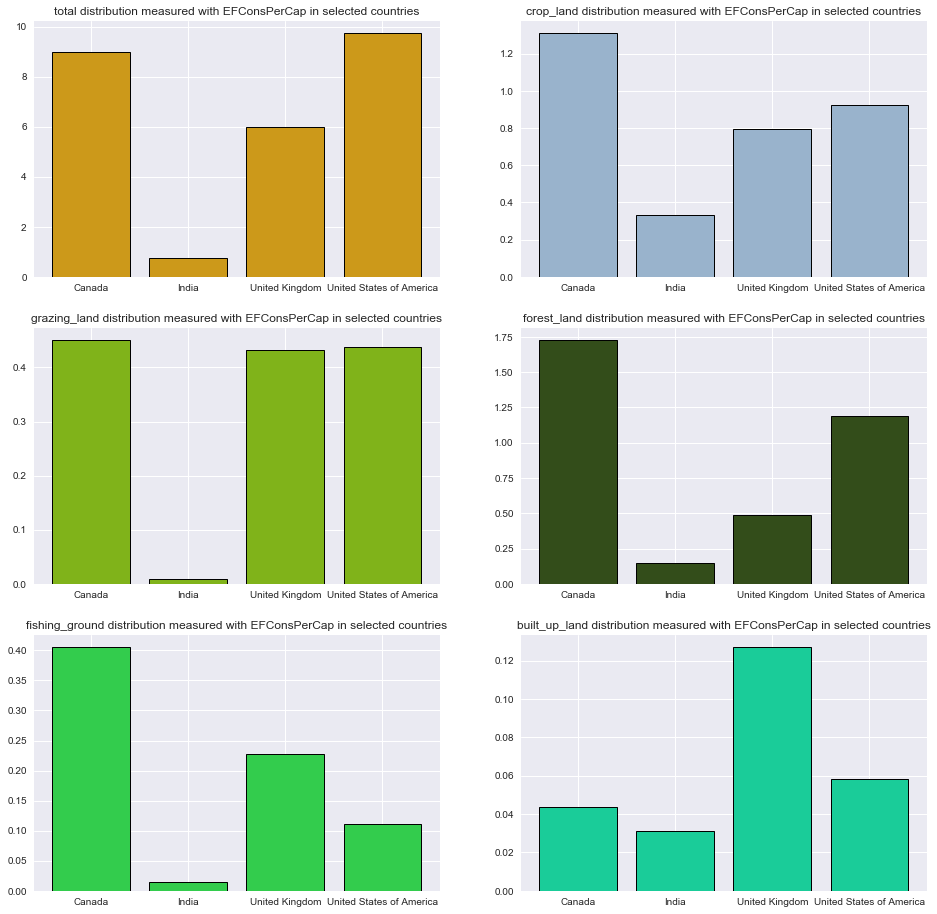

In [441]:
bar_charts('EFConsPerCap')

- When measured with ecological footprint consumption per capita, as previous Canada has lot of ecological foot prints.
- When compared to other countries, India has the lowest.

## 3D Plots

In [559]:
def plot_3D(record,var1,var2,var3,elevation =0,azimuth = 0):
    
    assert type(elevation) == int,"Elevation must be an integer"
    assert type(azimuth) == int,"Azimuth must be an integer"
    
    df2 = df1[df1['record'] == record]
    c1 = df1[df1['country'] == 'Canada']
    c2 = df1[df1['country'] == 'India']
    c3 = df1[df1['country'] == 'United Kingdom']
    c4 = df1[df1['country'] == 'United States of America']
    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection = '3d')
    ax.scatter3D(c1[var1],c1[var2],c1[var3],label = 'Canada' ,c = 'red' )
    ax.scatter3D(c2[var1],c2[var2],c2[var3],label = 'India' ,c = 'green' )
    ax.scatter3D(c3[var1],c3[var2],c3[var3],label = 'United Kingdom' ,c = 'blue' )
    ax.scatter3D(c4[var1],c4[var2],c4[var3],label = 'United States of America' ,c = 'black' )
    ax.legend(loc = 'best', fontsize = 12)
    ax.set_xlabel(f'{var1}')
    ax.set_ylabel(f'{var2}')
    ax.set_zlabel(f'{var3}')
    ax.set_title(f'Anlyzing relationship between {var1},{var2} and {var3} measured in {record}',)
    if((elevation >0) or (azimuth > 0)):
        ax.view_init(elevation, azimuth)

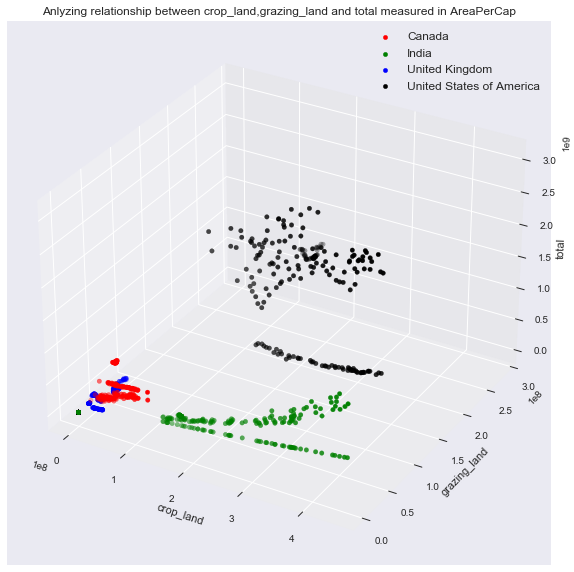

In [566]:
plot_3D('AreaPerCap','crop_land','grazing_land','total')

- 3D scatter plot of variable crop_land, grazing_land and total ecological foot print along with the seleted 4 countries.

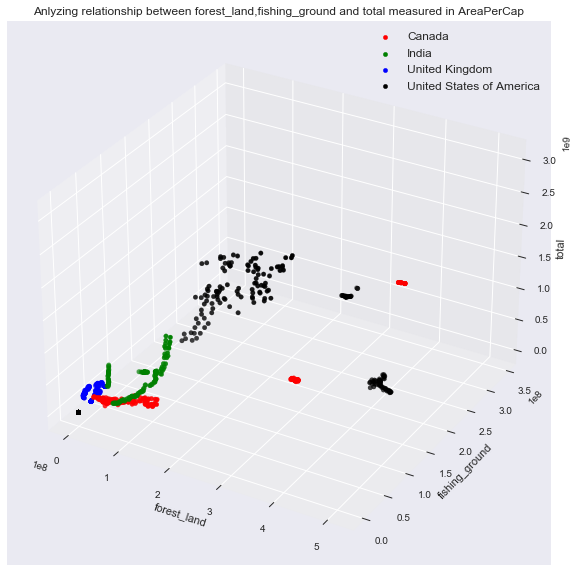

In [567]:
plot_3D('AreaPerCap','forest_land','fishing_ground','total')

- 3D scatter plot of variable forrest_land, fishing_ground and total ecological foot print along with the seleted 4 countries.

## Annotations and Texts

In [570]:
v1 = df1.groupby(['country','QScore'])['country'].count()


country                   QScore
Canada                    3A        432
India                     3A        432
United Kingdom            3A        432
United States of America  3A        432
Name: country, dtype: int64

- Q Score measure the data quality of the countries
- 3A >>>>> No component of BC or EF is unreliable or unlikely for any year.

In [571]:
df1.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Canada,1961-01-01,33,AreaPerCap,2.600747e+00,1.215682e+00,1.860724e+01,1.878245e+01,0.029282,0.000000,4.123541e+01,3A
1,Canada,1961-01-01,33,AreaTotHA,4.758300e+07,2.224200e+07,3.404363e+08,3.436419e+08,535732.971200,0.000000,7.544389e+08,3A
2,Canada,1961-01-01,33,BiocapPerCap,1.470099e+00,6.383620e-01,1.724884e+01,6.882446e+00,0.016552,0.000000,2.625629e+01,3A
3,Canada,1961-01-01,33,BiocapTotGHA,2.689679e+07,1.167941e+07,3.155830e+08,1.259205e+08,302828.670800,0.000000,4.803825e+08,3A
4,Canada,1961-01-01,33,EFConsPerCap,5.949279e-01,6.208782e-01,2.342809e+00,6.327288e-01,0.016552,3.230898,7.438794e+00,3A


In [574]:
cluster_data = df1.drop(['country','year','country_code','QScore'], axis=1)

In [575]:
cluster_data.head()

,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total
0,AreaPerCap,2.600747e+00,1.215682e+00,1.860724e+01,1.878245e+01,0.029282,0.000000,4.123541e+01
1,AreaTotHA,4.758300e+07,2.224200e+07,3.404363e+08,3.436419e+08,535732.971200,0.000000,7.544389e+08
2,BiocapPerCap,1.470099e+00,6.383620e-01,1.724884e+01,6.882446e+00,0.016552,0.000000,2.625629e+01
3,BiocapTotGHA,2.689679e+07,1.167941e+07,3.155830e+08,1.259205e+08,302828.670800,0.000000,4.803825e+08
4,EFConsPerCap,5.949279e-01,6.208782e-01,2.342809e+00,6.327288e-01,0.016552,3.230898,7.438794e+00


In [579]:
c1 = cluster_data[cluster_data['record'] == 'AreaPerCap']
c2 = c1.drop('record', axis=1)

In [597]:
kmc = KMeans(n_clusters=2)
kmc.fit(c2)
kmc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [598]:
kmc.inertia_

2858.0010633254856

In [600]:
all_inertias = []
K = range(2,11)
for k in K:
    model = KMeans(n_clusters=k)
    kmc1 = model.fit(c2)
    all_inertias.append(kmc1.inertia_)

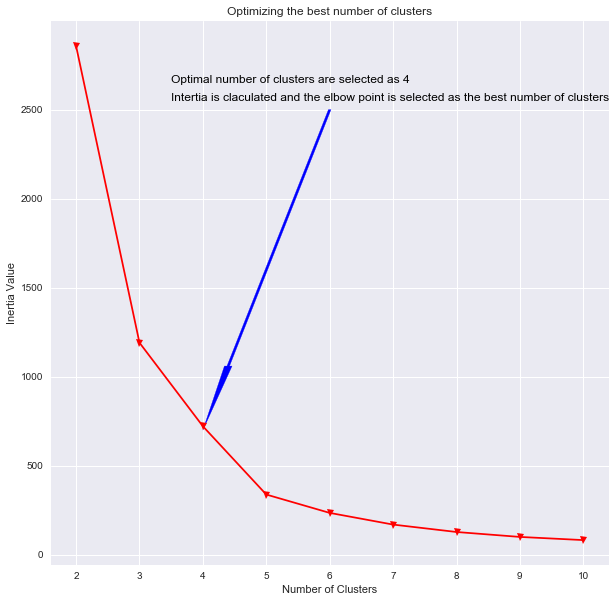

In [639]:
fig, ax = plt.subplots(figsize = (10,10))

ax.plot(K,all_inertias,'-v', c='red')
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Inertia Value")
ax.set_title("Optimizing the best number of clusters");

ar = plt.Arrow(6,2500,-2,-1800,width = 0.2, color = 'blue')
ax.add_patch(ar)

style = dict(size = 12, color = 'black')
text = "Optimal number of clusters are selected as 4"
text1 = "Intertia is claculated and the elbow point is selected as the best number of clusters"
ax.text(3.5,2650,text,**style)
ax.text(3.5,2550,text1,**style);

- All the quantitative can be clustered in to 4 groups according the plot
- elbow point is selected as the best number of clusters

In [640]:
klabels = KMeans(n_clusters=4)
klabels.fit(c2)

KMeans(n_clusters=4)

In [642]:
print(klabels.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


- Labels according to the clustering